# Investment Analysis Assignment

## Project Brief
You work for Spark Funds, an [asset management company](http://www.wallstreetmojo.com/what-is-asset-management-company-amc/). Spark Funds wants to make investments in a few companies. <br> The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.

## Business and Data Understanding

Spark Funds has two minor constraints for investments:

1. It wants to invest between 5 to 15 million USD per round of investment

2. It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in

3. For your analysis, consider a country to be English speaking only if English is one of the official languages in that country

4. You may use this list: Click [here](https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language) for a list of countries where English is an official language.



## Datasets Available
1. Company details
> __companies__: `A table with basic data of companies`
2. Funding round details: 
> __rounds2__: `Details about funding`
3. Sector Classification:
> __mapping.csv__: `This file maps the numerous category names in the companies table (such 3D printing, aerospace, agriculture, etc.) to eight broad sector names. The purpose is to simplify the analysis into eight sector buckets, rather than trying to analyse hundreds of them.`

## Checkpoint 1: Data Cleaning 1

We have to answer the below queries by studying the above listed Datasets.

> 1. __`How many unique companies are present in rounds2?`__ <br>
<br>
> 2. __`How many unique companies are present in companies?	`__ <br>
<br>
> 3. __`In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.`__ <br>
<br>
> 4. __`Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N`__ <br>
<br>
> 5. __`Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?`__

### Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 30)
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# plt.style.use('fivethirtyeight')
plt.style.use('seaborn-pastel')
sns.set_style('darkgrid')

### Load datasets

In [3]:
# loading the dataset directly has issues with encoding.
# found this stackoverflow link useful:https://stackoverflow.com/questions/22216076/unicodedecodeerror-utf8-codec-cant-decode-byte-0xa5-in-position-0-invalid-s
df_companies = pd.read_csv('../Data/companies.csv',encoding='unicode_escape') 
# df_companies = pd.read_csv('../Data/companies.csv',encoding='ISO-8859-1')
df_rounds = pd.read_csv('../Data/rounds2.csv',encoding='unicode_escape')
# df_rounds = pd.read_csv('../Data/rounds2.csv',encoding='ISO-8859-1')

df_mapping = pd.read_csv('../Data/mapping.csv')

### Check first few rows of all datasets

In [4]:
df_companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [5]:
df_rounds.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,"10,000,000.00"
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,"700,000.00"
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,"3,406,878.00"
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,"2,000,000.00"


In [6]:
df_mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


### Analyzing the shape of the datasets


In [7]:
print(f'The Companies dataset contains {df_companies.shape[0]} rows and {df_companies.shape[1]} columns')

The Companies dataset contains 66368 rows and 10 columns


In [8]:
print(f'The Funding rounds dataset contains {df_rounds.shape[0]} rows and {df_rounds.shape[1]} columns')

The Funding rounds dataset contains 114949 rows and 6 columns


In [9]:
print(f'The Sector Classification dataset contains {df_mapping.shape[0]} rows and {df_mapping.shape[1]} columns')

The Sector Classification dataset contains 688 rows and 10 columns


### Question 1: How many unique companies are present in rounds2? 

#### Analyzing the Funding rounds dataset


In [10]:
#Checking the columns and the data type for each column
df_rounds.dtypes

company_permalink           object
funding_round_permalink     object
funding_round_type          object
funding_round_code          object
funded_at                   object
raised_amount_usd          float64
dtype: object

In [11]:
# Checking the descriptive statistics of the dataset
df_rounds.describe(include=[object]) #https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at
count,114949,114949,114949,31140,114949
unique,90247,114949,14,8,5033
top,/ORGANIZATION/SOLARFLARE,/funding-round/a7ff7a492b6d06f20ce8dc0ea654187e,venture,A,01-01-2014
freq,10,1,55494,14747,779


_So it seems to be that there are __90,247__ unique companies present in the Funding Rounds Dataset. But the text in the __company_permalink__ column does not have uniform case . So let's verify the unique companies after normalizing it to lower case._

In [12]:
df_companies['permalink'] = df_companies.permalink.str.lower()
df_rounds['company_permalink'] = df_rounds.company_permalink.str.lower()
df_companies['name'] = df_companies.name.str.lower()

In [13]:
# Checking the descriptive statistics of the dataset again with lower case
df_rounds.describe(include=[object])

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at
count,114949,114949,114949,31140,114949
unique,66370,114949,14,8,5033
top,/organization/solarflare,/funding-round/a7ff7a492b6d06f20ce8dc0ea654187e,venture,A,01-01-2014
freq,19,1,55494,14747,779


In [14]:
#  Confirm with nunique()
print(f'The no of unique companies present in the rounds2 dataset is {df_rounds.company_permalink.nunique()}')

The no of unique companies present in the rounds2 dataset is 66370


__Answer 1:__ _The no of unique companies present in the rounds2 dataset is `66,370` _





### Question 2: How many unique companies are present in companies? 

We now have to analyze the company data in a similar way.

In [15]:
#Checking the columns and the data type for each column
df_companies.dtypes

permalink        object
name             object
homepage_url     object
category_list    object
status           object
country_code     object
state_code       object
region           object
city             object
founded_at       object
dtype: object

In [16]:
# Checking the descriptive statistics of the dataset
df_companies.describe(include=[object]) #https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66034,61191,27296,4,137,311,1092,5111,3978
top,/organization/centene-corporation,peach,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


__Answer 2:__ _There are `66,368` unique companies in the Companies Dataset as we can see from the descriptive statistics of the __Permanlink__ column_

### Question 3: In the companies data frame, which column can be used as the unique key for each company? Write the name of the column. 

__Answer 3:__ _ As understood from the Description of the Companies Table, the column __Permalink__ holds the Unique ID of the company._ <br> _So it can used as the Unique key for each company.  _

### Question 4: Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N  

Lets check the both companies and rounds datasets again.

In [17]:
df_companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [18]:
df_rounds.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,"10,000,000.00"
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,"700,000.00"
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,"3,406,878.00"
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,"2,000,000.00"


We can try finding the answer for the question by checking for the values of the Permalink and Company_Permalink.

Looks good ! Let's try to find the common companies again with the new columns.

In [19]:
# Get the values of the companies in the rounds df which are not present in companies df.
df_not_in_companies = df_rounds[~df_rounds.company_permalink.isin(df_companies.permalink)]

In [20]:
df_not_in_companies.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/organization/e-cãbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,nan
31863,/organization/energystone-games-çµç³æ¸¸æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,nan
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,nan
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,"1,625,585.00"
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,nan


In [21]:
print(f'There are {len(df_not_in_companies)} companies in the rounds2 dataset which are not present in companies dataset ')

There are 7 companies in the rounds2 dataset which are not present in companies dataset 


In [22]:
# Now let's do the same thing using set operations
# SET operations {A}-{B}
unique_companies_in_rounds = set(df_rounds.company_permalink)
unique_companies_in_companies = set(df_companies.permalink)

In [23]:
print(f'No. of companies in the rounds2 file which are not present in companies: {len(unique_companies_in_rounds - unique_companies_in_companies)}')

No. of companies in the rounds2 file which are not present in companies: 7


In [24]:
# verifying with np.setdifference
# len(np.setdiff1d(df_rounds.company_permalink,df_companies.permalink) )

In [25]:
print(f'No. of companies in the Companies file which are not present in rounds2: {len( unique_companies_in_companies  - unique_companies_in_rounds)}')

No. of companies in the Companies file which are not present in rounds2: 5


__Answer 4:__ _ __Yes,__ there are companies in the rounds2 file which are not present in companies  _

### Question 5: Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame? 

In [26]:
master_frame = df_rounds.merge(df_companies,right_on = 'permalink',left_on = 'company_permalink',how='left')

In [27]:
master_frame.drop(columns =['company_permalink'],inplace=True)

In [28]:
master_frame.head()

,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,"10,000,000.00",/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,"700,000.00",/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,"3,406,878.00",/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,"2,000,000.00",/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [29]:
master_frame.describe(include=[object])

,funding_round_permalink,funding_round_type,funding_round_code,funded_at,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,114949,114949,31140,114949,114942,114941,108810,111535,114942,106271,104003,104782,104785,94422
unique,114949,14,8,5033,66363,66029,61188,27295,4,137,311,1092,5111,3977
top,/funding-round/a7ff7a492b6d06f20ce8dc0ea654187e,venture,A,01-01-2014,/organization/solarflare,solarflare communications,http://www.solarflare.com,Biotechnology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,55494,14747,779,19,19,19,8165,90151,72308,26664,19078,7422,4642


In [30]:
print(f'No. of observations in Master Frame: {len(master_frame)}')

No. of observations in Master Frame: 114949


__Answer 5:__ _ There are `114949` records in the master_frame  _

In [31]:
# Save the master_frame
master_frame.to_csv('../Data/master_frame.csv')

## Checkpoint 2: Funding Type Analysis

This is the first of the three goals of data analysis – investment type analysis.

The funding types such as seed, venture, angel, etc. depend on the type of the company (startup, corporate, etc.), its stage (early stage startup, funded startup, etc.), the amount of funding (a few million USD to a billion USD), and so on. For example, seed, angel and venture are three common stages of startup funding.

1. Seed/angel funding refer to early stage startups whereas venture funding occurs after seed or angel stage/s and involves a relatively higher amount of investment.
<br>

2. Private equity type investments are associated with much larger companies and involve much higher investments than venture type. Startups which have grown in scale may also receive private equity funding. This means that if a company has reached the venture stage, it would have already passed through the angel or seed stage/s.

__Spark Funds wants to choose one of these four investment types for each potential investment they will make.__

Considering the constraints of Spark Funds, you have to decide one funding type which is most suitable for them.

1. Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity) and report the answers in Table 2.1

2. Based on the most representative investment amount calculated above, which investment type do you think is the most suitable for Spark Funds?

Considering that Spark Funds wants to invest between 5 to 15 million USD per investment round, which investment type is the most suitable for it? Identify the investment type and, for further analysis, filter the data so it only contains the chosen investment type.

_Now let us try to answer the first question:Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity)._

In [32]:
# Funding Type Counts
funding_type_counts = pd.DataFrame(master_frame.funding_round_type.value_counts())

In [33]:
funding_type_counts = funding_type_counts.reset_index()

In [34]:
funding_type_counts.columns = ['Funding Type','Count']

In [35]:
selected_funding_type_counts = funding_type_counts.loc[funding_type_counts['Funding Type'].isin(['venture','seed','angel','private_equity'])]

In [36]:
selected_funding_type_counts

,Funding Type,Count
0,venture,55494
1,seed,30524
3,angel,6094
6,private_equity,2285


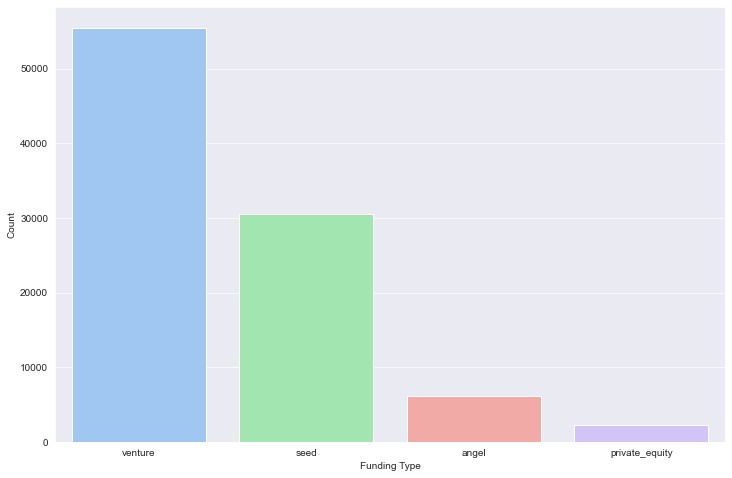

In [37]:
plt.figure(figsize=(12,8))
sns.barplot(x = 'Funding Type',y='Count',data=selected_funding_type_counts)
plt.show()

In [38]:
# Check for NaNs
master_frame.isna().sum()

funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      7
name                           8
homepage_url                6139
category_list               3414
status                         7
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20527
dtype: int64

_The raised amount column has 19,984 NaN values but we will continue our analysis without handling the missing values. As it was said earlier Missing values should not be replaced without understanding why they exist._

_At times, it is better to do the analysis by ignoring the missing values, instead of replacing the missing values by other values. So we will remove the rows where raised amount is NaN_ 

In [39]:
master_frame.dropna(subset = ['raised_amount_usd'],inplace=True)

In [40]:
master_frame.isna().sum()

funding_round_permalink        0
funding_round_type             0
funding_round_code         66790
funded_at                      0
raised_amount_usd              0
permalink                      1
name                           2
homepage_url                4333
category_list               1045
status                         1
country_code                5851
state_code                  7604
region                      7048
city                        7045
founded_at                 15967
dtype: int64

In [41]:
# In order to find the aggregate of the investment values based on the funding type, we have to perform a groupby operation

investment_amount_by_funding_type = master_frame[master_frame.funding_round_type.isin(['venture','seed','angel','private_equity'])].groupby('funding_round_type')[['raised_amount_usd']].mean()

In [42]:
# pd.set_option('display.float_format', lambda x: '%.2f' % x)
investment_amount_by_funding_type

,raised_amount_usd
funding_round_type,
angel,"958,694.47"
private_equity,"73,308,593.03"
seed,"719,818.00"
venture,"11,748,949.13"


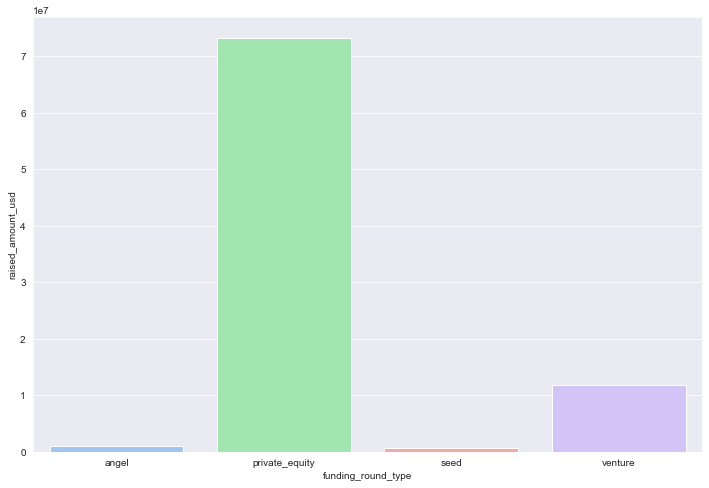

In [43]:
plt.figure(figsize=(12,8))
sns.barplot(x = investment_amount_by_funding_type.index,y='raised_amount_usd',data=investment_amount_by_funding_type)
plt.show()

1. _ Average funding amount of venture type: USD `11,748,949.13` _
2. _ Average funding amount of angel type: USD `958,694.47` _
3. _ Average funding amount of seed type: USD `719,779.62` _
4. _ Average funding amount of private equity type: USD `73,308,593.03` _

_ Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them? _

__Answer__ : The `Venture type` Investment would be the most suitable investment opportunity as it's average funding amount comes under the company investment budget of 5 to 15 million dollars. 


## Checkpoint 3: Country Analysis

This is the second goal of analysis — country analysis.

 

Now that you know the type of investment suited for Spark Funds, let's narrow down the countries.

 

Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type.

This is a part of its broader strategy to invest where most investments are occurring.

1. Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)

2. For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)


In [44]:
# Countries with "Venture" Funding type 
venture_funding = master_frame[master_frame.funding_round_type == 'venture'].groupby('country_code')[['raised_amount_usd']].sum().reset_index()

In [45]:
venture_funding.sort_values(by = 'raised_amount_usd', inplace=True,ascending=False)

In [46]:
# The Top 9 contries as per the raised amount for Venture Type Funding
top9 = venture_funding.head(9)

In [47]:
top9.rename(columns={'raised_amount_usd':'total_investments_in_usd'},inplace=True)

In [48]:
top9

,country_code,total_investments_in_usd
94,USA,"422,510,842,796.00"
15,CHN,"39,835,418,773.00"
29,GBR,"20,245,627,416.00"
39,IND,"14,391,858,718.00"
12,CAN,"9,583,332,317.00"
28,FRA,"7,259,536,732.00"
42,ISR,"6,907,514,579.00"
21,DEU,"6,346,959,822.00"
45,JPN,"3,363,676,611.00"


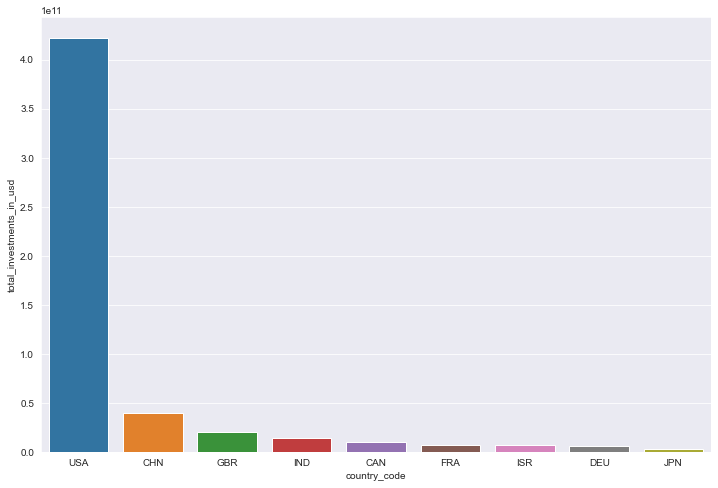

__Question__ : _Identify the top three English-speaking countries in the data frame top9._



__Answer:__ By Referring to the link https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language, we can identify the top 3 English speaking countries as __`USA, GBR, IND.`__

### Checkpoint 4: Sector Analysis 1

This is the third goal of analysis — sector analysis.

When we say sector analysis, we refer to one of the eight main sectors (named main_sector) listed in the mapping file (note that ‘Other’ is one of the eight main sectors).<br> This is to simplify the analysis by grouping the numerous category lists (named ‘category_list’) in the mapping file. <br> For example, in the mapping file, category_lists such as ‘3D’, ‘3D Printing’, ‘3D Technology’, etc. are mapped to the main sector ‘Manufacturing’.

Also, for some companies, the category list is a list of multiple sub-sectors separated by a pipe (vertical bar |).<br> For example, one of the companies’ category_list is Application Platforms|Real Time|Social Network Media.

You discuss with the CEO and come up with the business rule that the first string before the vertical bar will be considered the primary sector. <br> In the example above, ‘Application Platforms’ will be considered the primary sector.

1. __Extract the primary sector of each category list from the category_list column.__
2. __Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors).__


__Expected Results:__ Code for a merged data frame with each primary sector mapped to its main sector (the primary sector should be present in a separate column).





In [49]:
# Let's look at the master_frame again
master_frame.head()

,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,"10,000,000.00",/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
2,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,"700,000.00",/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,"3,406,878.00",/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,"2,000,000.00",/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
6,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,"41,250.00",/organization/01games-technology,01games technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN


In [50]:
df_mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [51]:
# Check for null values in mapping dataset
df_mapping.isna().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [52]:
# Fill NaN with a more readable value
df_mapping.category_list.fillna('Missing_Value',inplace=True)

In [53]:
df_mapping.shape

(688, 10)

In [54]:
df_mapping.isna().sum()

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

_As the first string before the vertical bar in the column __category_list__ of the __Master_Frame__ will be considered the primary sector._

_We have to extract the 1st value and give it its separate column and then join it with the __mapping__ dataframe._

_But first, we have to normalize the respective text columns for both the dataframes._



In [55]:
# convert to lower case
master_frame['category_list'] = master_frame['category_list'].str.lower()
df_mapping['category_list'] = df_mapping['category_list'].str.lower()

In [56]:
df_mapping[df_mapping['category_list'].str.contains('0')].head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
20,alter0tive medicine,0,0,0,0,1,0,0,0,0
22,a0lytics,0,0,0,0,0,0,0,0,1
59,big data a0lytics,0,0,0,0,0,0,0,0,1
79,business a0lytics,0,0,0,0,0,0,0,0,1
89,can0bis,0,0,0,0,1,0,0,0,0


_On inspecting the mapping data, there are some errors which need to be cleaned, before we merge. Most of the words with 'na' has been replaced with 0 in them._ 

In [57]:
df_mapping['category_list'] = df_mapping['category_list'].apply(lambda x : x.replace('0','na')) 

In [58]:
# Verify that values are cleaned
df_mapping[df_mapping['category_list'].str.contains('0')].head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"


In [59]:
df_mapping[df_mapping['category_list'] == 'analytics'].head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
22,analytics,0,0,0,0,0,0,0,0,1


In [60]:
df_mapping[df_mapping['category_list'] == 'cannabis'].head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
89,cannabis,0,0,0,0,1,0,0,0,0


In [61]:
master_frame.isna().sum()

funding_round_permalink        0
funding_round_type             0
funding_round_code         66790
funded_at                      0
raised_amount_usd              0
permalink                      1
name                           2
homepage_url                4333
category_list               1045
status                         1
country_code                5851
state_code                  7604
region                      7048
city                        7045
founded_at                 15967
dtype: int64

_There are around 1045 missing category_list in the master_frame, lets drop them for further analysis_

In [62]:
master_frame.category_list.fillna('Missing_Value',inplace=True)

In [63]:
# Extract Primary Sector
master_frame.reset_index(inplace=True,drop=True)
master_frame['primary_sector'] = master_frame['category_list'].apply(lambda x: x.split('|')[0] )

In [64]:
master_frame.tail()

,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector
94954,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,NaN,01-08-2013,"33,149.00",/organization/zzzzapp-com,zzzzapp wireless ltd.,http://www.zzzzapp.com,advertising|mobile|web development|wireless,operating,HRV,15,Split,Split,13-05-2012,advertising
94955,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,"41,313.00",/organization/zzzzapp-com,zzzzapp wireless ltd.,http://www.zzzzapp.com,advertising|mobile|web development|wireless,operating,HRV,15,Split,Split,13-05-2012,advertising
94956,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,"32,842.00",/organization/zzzzapp-com,zzzzapp wireless ltd.,http://www.zzzzapp.com,advertising|mobile|web development|wireless,operating,HRV,15,Split,Split,13-05-2012,advertising
94957,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,"18,192.00",/organization/ãasys-2,ãasys,http://www.oasys.io/,consumer electronics|internet of things|teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014,consumer electronics
94958,/funding-round/af942869878d2cd788ef5189b435ebc4,grant,NaN,01-10-2013,"14,851.00",/organization/ä°novatiff-reklam-ve-tanä±tä±m-h...,ä°novatiff reklam ve tanä±tä±m hizmetleri tic,http://inovatiff.com,consumer goods|e-commerce|internet,operating,NaN,NaN,NaN,NaN,NaN,consumer goods


In [65]:
# Now lets join the master_frame and mapping dataframes.
df_primary_sector = master_frame.merge(df_mapping, how='left',left_on = 'primary_sector',right_on = 'category_list',suffixes=(None,'_mapping'))

In [66]:
df_primary_sector.sample(10)

,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,category_list_mapping,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
38377,/funding-round/73aa745522f43bed10241eb22a0dc7c0,venture,C,09-07-2001,"9,500,000.00",/organization/ikimbo,ikimbo,NaN,software,operating,USA,VA,"Washington, D.C.",Reston,01-01-1999,software,software,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
43304,/funding-round/c2b8e23ff89e5d17940b4f0e104e2e05,seed,NaN,14-01-2014,"30,000.00",/organization/karma-snap,karma snap,http://www.karmasnap.com,advertising|collaboration|crowdfunding|crowdso...,operating,ARE,3,Dubai,Dubai,10-11-2013,advertising,advertising,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
28144,/funding-round/7b35941de4c192a60e1b4bb4f40657ae,venture,B,14-04-2010,"1,000,000.00",/organization/excelimmune,excelimmune,http://www.excelimmune.com,biotechnology,operating,USA,MA,Boston,Woburn,NaN,biotechnology,biotechnology,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
15817,/funding-round/16e2afd8a4fee1be67afd1c77361aeb5,seed,NaN,01-01-2014,"150,000.00",/organization/charlottes-book,charlottes book,http://www.charlottesbook.com/,beauty|cosmetic surgery|health and wellness,operating,USA,NY,New York City,New York,06-07-2011,beauty,beauty,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
90999,/funding-round/527aefe6eb21c95ac46e27fe925c4d42,debt_financing,NaN,06-01-2015,"422,156.00",/organization/wentworth-technology,wentworth technology,http://www.wentworthtechnology.com,mobile,operating,USA,ME,"Portland, Maine",Saco,01-01-2010,mobile,mobile,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
77273,/funding-round/8f604354905c9fa612dd663583b51813,seed,NaN,05-10-2012,"40,000.00",/organization/speedelo,speedelo,http://www.speedelo.com,e-commerce,operating,CHL,12,Santiago,Santiago,01-01-2012,e-commerce,e-commerce,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
89208,/funding-round/dba1120e1b2fd642a012d8134f45d192,venture,B,28-12-2006,"1,379,769.00",/organization/visys,visys,http://www.visysglobal.com,hospitality,operating,BEL,5,Brussels,Hasselt,07-10-2004,hospitality,hospitality,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
67727,/funding-round/b5801c89b18c034defc6d6039b5ca672,venture,A,27-03-2014,"9,000,000.00",/organization/realty-mogul,realtymogul.com,http://www.realtymogul.com,fintech|real estate,operating,USA,CA,Los Angeles,Los Angeles,01-01-2013,fintech,fintech,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
20180,/funding-round/dd33eb95dc8205cfd9aae13a7aca9b44,venture,NaN,26-03-2014,"30,000,000.00",/organization/cpxi,cpxi,http://www.cpxi.com,advertising|curated web|internet marketing,operating,USA,NY,New York City,New York,01-01-2000,advertising,advertising,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
82086,/funding-round/50fd0a9f5924417650bd4c83efa1e75f,seed,NaN,05-03-2013,"46,007.00",/organization/the-app-base-inc,the app base inc,http://the-app-base.com,software,operating,JPN,NaN,NaN,NaN,09-07-2012,software,software,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00


In [67]:
# Only select the last few One hot encoded columns and find the column with 1 in it and assign it as the main_sector
df_primary_sector['main_sector'] = df_primary_sector[df_primary_sector.columns[-9:]].idxmax(1)

In [68]:
# Now remove the One hot encoded columns
columns_to_be_removed = df_primary_sector.columns[-10:-1].values
df_primary_sector = df_primary_sector.loc[:,~df_primary_sector.columns.isin(columns_to_be_removed)]

In [69]:
df_primary_sector.drop('category_list_mapping', axis=1, inplace=True)

In [70]:
df_primary_sector.head()

,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,"10,000,000.00",/organization/-fame,#fame,http://livfame.com,media,operating,IND,16,Mumbai,Mumbai,NaN,media,Entertainment
1,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,"700,000.00",/organization/-qounter,:qounter,http://www.qounter.com,application platforms|real time|social network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,application platforms,"News, Search and Messaging"
2,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,"3,406,878.00",/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,apps|games|mobile,operating,NaN,NaN,NaN,NaN,NaN,apps,"News, Search and Messaging"
3,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,"2,000,000.00",/organization/0-6-com,0-6.com,http://www.0-6.com,curated web,operating,CHN,22,Beijing,Beijing,01-01-2007,curated web,"News, Search and Messaging"
4,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,"41,250.00",/organization/01games-technology,01games technology,http://www.01games.hk/,games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN,games,Entertainment


### Checkpoint 5: Sector Analysis 2



Now you have a data frame with each company’s main sector (main_sector) mapped to it. When we say sector analysis, we refer to one of the eight main sectors.

 

Also, you know the top three English speaking countries and the most suitable funding type for Spark Funds.

Let’s call the three countries 'Country 1', 'Country 2' and 'Country 3' and the funding type 'FT'.

Also, the range of funding preferred by Spark Funds is __5 to 15 million USD.__

<br>
Now, the aim is to find out the most heavily invested main sectors in each of the three countries (for funding type FT and investments range of 5-15 M USD).
<br>

1. Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range. The three data frames should contain:

> - All the columns of the master_frame along with the primary sector and the main sector

> - The total number (or count) of investments for each main sector in a separate column

> - The total amount invested in each main sector in a separate column





In [71]:
df_venture_within_invst_range = df_primary_sector[( df_primary_sector.funding_round_type == 'venture' ) &  \
                                                ( (df_primary_sector.raised_amount_usd >= 5000000.00 ) & ( df_primary_sector.raised_amount_usd <= 15000000.00 ) ) ]

In [72]:
df_venture_within_invst_range.head()

,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,"10,000,000.00",/organization/-fame,#fame,http://livfame.com,media,operating,IND,16,Mumbai,Mumbai,NaN,media,Entertainment
10,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,"8,900,000.00",/organization/0xdata,h2o.ai,http://h2o.ai/,analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,analytics,"Social, Finance, Analytics, Advertising"
16,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,"5,000,000.00",/organization/1-mainstream,1 mainstream,http://www.1mainstream.com,apps|cable|distribution|software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,apps,"News, Search and Messaging"
37,/funding-round/645b4cd895450b8e0268027cd7813047,venture,B,04-11-2015,"6,602,694.00",/organization/1001-menus,zenchef,http://zenchef.com/en/,local businesses|restaurants,operating,FRA,A8,Paris,Paris,20-11-2010,local businesses,Others
41,/funding-round/a21fc4d20200f43e3a25fd9cfc7c1482,venture,A,09-07-2015,"8,900,000.00",/organization/1001pharmacies-com,1001pharmacies.com,http://www.1001pharmacies.com/,cosmetics|marketplaces,operating,FRA,A9,Montpellier,Montpellier,01-01-2012,cosmetics,Health


In [73]:
df_venture_within_invst_range.describe()

,raised_amount_usd
count,"16,598.00"
mean,"8,888,550.51"
std,"3,060,398.51"
min,"5,000,000.00"
25%,"6,000,000.00"
50%,"8,269,594.50"
75%,"11,000,000.00"
max,"15,000,000.00"


In [74]:
df_venture_within_invst_range.describe(include='object')

,funding_round_permalink,funding_round_type,funding_round_code,funded_at,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
count,16598,16598,11690,16598,16598,16598,15706,16598,16598,15895,15656,15711,15711,13684,16598,16398
unique,16598,1,8,3676,12129,12119,11342,4961,4,74,198,517,1503,1061,478,8
top,/funding-round/5a25d6735a3d0a914ac70273721f89e6,venture,A,01-01-2008,/organization/airspan-networks,airspan networks,http://airspan.com,biotechnology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2005,biotechnology,Others
freq,1,16598,4834,63,9,9,9,1482,11277,12150,5478,4284,1288,728,1873,4005


_We now have a dataframe with funding type as Venture and raised amount between 5 million and 15 million._

In [75]:
D1 = df_venture_within_invst_range[df_venture_within_invst_range.country_code == 'USA']

In [76]:
D1.shape

(12150, 17)

In [77]:
D1.head()

,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
10,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,"8,900,000.00",/organization/0xdata,h2o.ai,http://h2o.ai/,analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,analytics,"Social, Finance, Analytics, Advertising"
16,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,"5,000,000.00",/organization/1-mainstream,1 mainstream,http://www.1mainstream.com,apps|cable|distribution|software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,apps,"News, Search and Messaging"
78,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,NaN,16-12-2014,"11,999,347.00",/organization/128-technology,128 technology,http://www.128technology.com/,service providers|technology,operating,USA,MA,Boston,Burlington,07-07-2014,service providers,Others
84,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,C,15-10-2013,"15,000,000.00",/organization/1366-technologies,1366 technologies,http://www.1366tech.com,manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,manufacturing,Manufacturing
85,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,C,09-04-2015,"5,000,000.00",/organization/1366-technologies,1366 technologies,http://www.1366tech.com,manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,manufacturing,Manufacturing


In [78]:
# The total number (or count) of investments for each main sector in a separate column'
# D1_count_of_investments = D1.groupby('main_sector')[['main_sector']].count().rename(columns = {'main_sector':'count_of_investments'}).reset_index()


In [79]:

# We have to do a left join on D1 and D1_count_of_investments to keep the counts in a separate column
# D1 = D1.merge(D1_count_of_investments, on = 'main_sector',how='left')

In [80]:
# The total amount invested in each main sector in a separate column
# D1_total_of_investments = D1.groupby('main_sector')[['raised_amount_usd']].sum().rename(columns = {'raised_amount_usd':'total_amount_of_investments'}).reset_index()

In [81]:
# D1 = D1.merge(D1_total_of_investments, on = 'main_sector',how='left')

In [82]:
D1.main_sector.value_counts()

Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
News, Search and Messaging                 1583
Health                                      909
Manufacturing                               799
Entertainment                               591
Automotive & Sports                         167
Name: main_sector, dtype: int64

In [83]:
D1.sample(10)

,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
52942,/funding-round/2c239ac4cd06478dbf49252a5edcd8c2,venture,A,21-09-2015,"10,000,000.00",/organization/morphick-cyber-security,morphick cyber security,http://www.Morphick.com,cyber|cyber security|security,operating,USA,OH,Cincinnati,Cincinnati,03-03-2015,cyber,"Social, Finance, Analytics, Advertising"
42673,/funding-round/d966991ee0c161359a4405cac22e0152,venture,A,01-08-2004,"5,200,000.00",/organization/jotspot,jotspot,http://www.jot.com,software,acquired,USA,CA,SF Bay Area,Palo Alto,NaN,software,Others
20788,/funding-round/a006dfb16c2dd385a83f9f0a99b0a3c3,venture,A,25-05-2012,"5,212,655.00",/organization/cryoport,cryoport,http://cryoport.com,bio-pharm|clinical trials|shipping,operating,USA,CA,Anaheim,Lake Forest,01-01-1999,bio-pharm,Cleantech / Semiconductors
31013,/funding-round/d77bd210521b897090fd2133ddaeaeb1,venture,A,01-07-2013,"5,262,724.00",/organization/fotopedia,fotopedia,http://fotopedia.com,advertising|crowdsourcing|curated web|mobile|news,operating,USA,CA,SF Bay Area,San Francisco,01-10-2008,advertising,"Social, Finance, Analytics, Advertising"
68312,/funding-round/2d924fe6bedfb457050a0a859b57b9c5,venture,B,26-09-2008,"8,250,000.00",/organization/regent-education,regent education,http://www.regenteducation.com,software,operating,USA,MD,Hagerstown,Frederick,NaN,software,Others
50035,/funding-round/cff6be3106ceb5d83b04d64d1517edd9,venture,B,27-01-2005,"7,500,000.00",/organization/medsphere-systems,medsphere systems,http://www.medsphere.com,software,operating,USA,CA,San Diego,Carlsbad,01-01-2002,software,Others
4659,/funding-round/035ea2030d597db5b8ad57f3510af4f5,venture,B,17-08-2009,"10,000,000.00",/organization/analogix-semiconductor,analogix semiconductor,http://www.analogix.com,semiconductors,operating,USA,CA,SF Bay Area,Santa Clara,01-03-2002,semiconductors,Cleantech / Semiconductors
43388,/funding-round/ad55d2e114b8ae2d0aff3a1ae1fddd29,venture,NaN,22-09-2009,"9,600,000.00",/organization/kbi-biopharma,kbi biopharma,http://kbibiopharma.com,biotechnology,operating,USA,NC,Raleigh,Durham,01-01-1996,biotechnology,Cleantech / Semiconductors
33680,/funding-round/583b89532ec0001f977bd29ad7a7a232,venture,NaN,26-05-2015,"8,125,000.00",/organization/gns-healthcare,gns healthcare,http://www.gnshealthcare.com,analytics|big data,operating,USA,MA,Boston,Cambridge,01-01-2000,analytics,"Social, Finance, Analytics, Advertising"
79282,/funding-round/9540ce9208266029629ec8b36772c690,venture,NaN,26-10-2015,"6,000,000.00",/organization/summa-health,summa health,http://www.summahealth.org/,Missing_Value,operating,USA,OH,Akron - Canton,Akron,NaN,Missing_Value,NaN


In [84]:
# Performing the above steps for USA,GBR & IND

def add_investment_details_per_sector(df):
    '''
        df: countrywise dataframe

        This function takes an input dataframe and adds count and total sum of investments to it after performing groupby
        and aggregation operations.
        Also returns the count and sum of investments separately 
    '''
    df_count_of_investments = df.groupby('main_sector')[['main_sector']].count().rename(columns = {'main_sector':'count_of_investments'})
    df = df.merge(df_count_of_investments, on = 'main_sector',how='left')
    df_total_of_investments = df.groupby('main_sector')[['raised_amount_usd']].sum().rename(columns = {'raised_amount_usd':'total_amount_of_investments'})
    df = df.merge(df_total_of_investments, on = 'main_sector',how='left')
    df_count_of_investments=df_count_of_investments.count_of_investments.sort_values(ascending=False).reset_index()
    df_total_of_investments=df_total_of_investments.total_amount_of_investments.sort_values(ascending=False).reset_index()

    return df,df_count_of_investments,df_total_of_investments

In [85]:
D1 = df_venture_within_invst_range[df_venture_within_invst_range.country_code == 'USA']
D1,D1_count_of_investments,D1_total_of_investments = add_investment_details_per_sector(D1)

In [86]:
D2 = df_venture_within_invst_range[df_venture_within_invst_range.country_code == 'GBR']
D2,D2_count_of_investments,D2_total_of_investments = add_investment_details_per_sector(D2)

In [87]:
D3 = df_venture_within_invst_range[df_venture_within_invst_range.country_code == 'IND']
D3,D3_count_of_investments,D3_total_of_investments = add_investment_details_per_sector(D3)

In [88]:
D3.sample(5)

,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,count_of_investments,total_amount_of_investments
251,/funding-round/5170659ad92ae8a7528c6932712fcb67,venture,A,27-10-2015,"9,000,000.00",/organization/razorpay,razorpay,https://razorpay.com/,fintech|payments,operating,IND,19,Bangalore,Bangalore,01-01-2013,fintech,"Social, Finance, Analytics, Advertising",60.00,"550,549,550.00"
162,/funding-round/cdfe7443b26bba8ea207ad9cdc5bc65c,venture,A,08-07-2015,"10,000,000.00",/organization/lendingkart,lendingkart,https://lendingkart.com/,financial services,operating,IND,9,Ahmedabad,Ahmedabad,01-01-2014,financial services,"Social, Finance, Analytics, Advertising",60.00,"550,549,550.00"
131,/funding-round/a6db91cc65af3ad1f15ee31ce40bfa2f,venture,B,12-12-2012,"9,200,000.00",/organization/icreate-software,icreate software,http://www.icreate.in,software,operating,IND,19,Bangalore,Bangalore,01-01-2006,software,Others,110.00,"1,013,409,507.00"
38,/funding-round/26650720abe4be67bb6550fd4ee6d063,venture,NaN,29-08-2012,"6,500,000.00",/organization/canvera-digital-technologies,canvera digital technologies,http://canvera.com,software,operating,IND,19,Bangalore,Bangalore,01-01-2007,software,Others,110.00,"1,013,409,507.00"
32,/funding-round/bc8fe7e67df39a38a43e1f685c2dd2a2,venture,NaN,05-07-2011,"6,100,000.00",/organization/bharat-light-and-power-group-pri...,bharat light and power group,http://www.blp.co.in/,clean technology,operating,IND,10,New Delhi,Gurgaon,01-01-2010,clean technology,Cleantech / Semiconductors,20.00,"165,380,000.00"


_Based on the analysis of the sectors, which main sectors and countries would you recommend Spark Funds to invest in? Present your conclusions in the presentation_.<br> The _conclusions are subjective (i.e. there may be no ‘one right answer’), but it should be based on the basic strategy — invest in sectors where most investments are occurring. _

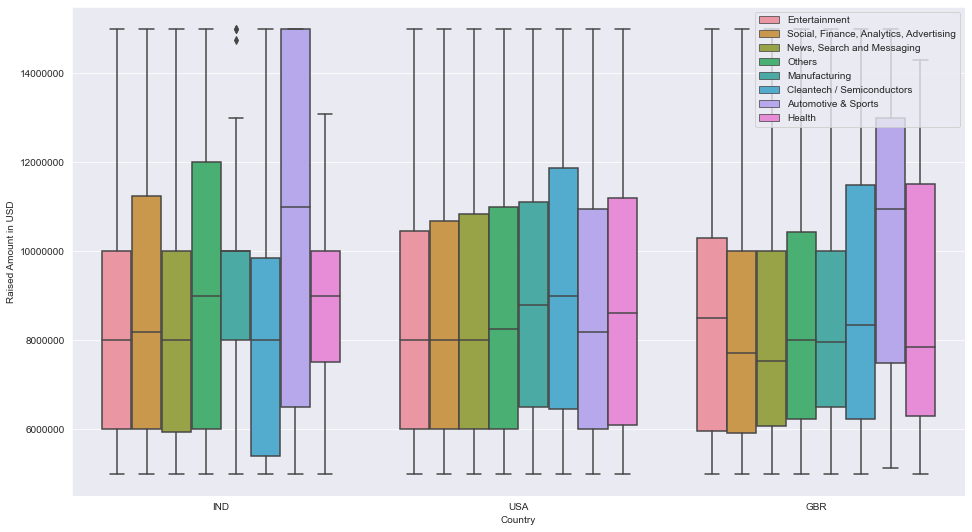

In [89]:
# sns.set_style('darkgrid')

plt.figure(figsize=(16,9))
sns.boxplot(x= 'country_code',y = 'raised_amount_usd',data=df_venture_within_invst_range[df_venture_within_invst_range.country_code.isin(['USA','GBR','IND'])],hue = 'main_sector')
plt.xlabel('Country')
plt.ylabel('Raised Amount in USD')
plt.ticklabel_format(style='plain', axis='y')
plt.legend(loc='upper right')
plt.show()

### Sector-wise Investment Analysis

1. Total number of investments

In [90]:
print(f'The total number of Investments for USA: {D1_count_of_investments.count_of_investments.sum()}')
print(f'The total number of Investments for United Kingdom(GBR): {D2_count_of_investments.count_of_investments.sum()}')
print(f'The total number of Investments for India(IND): {D3_count_of_investments.count_of_investments.sum()}')

The total number of Investments for USA: 12063
The total number of Investments for United Kingdom(GBR): 621
The total number of Investments for India(IND): 328


In [91]:
print(f'The total amount of Investments in USA: {D1_total_of_investments.total_amount_of_investments.sum():,.2f}')
print(f'The total amount of Investments in United Kingdom(GBR): {D2_total_of_investments.total_amount_of_investments.sum():,.2f}')
print(f'The total amount of Investments in India(IND): {D3_total_of_investments.total_amount_of_investments.sum():,.2f}')

The total amount of Investments in USA: 107,757,097,294.00
The total amount of Investments in United Kingdom(GBR): 5,379,078,691.00
The total amount of Investments in India(IND): 2,949,543,602.00


In [92]:
def show_bar_plot(x_data,y_data):
    sns.barplot(x = x_data ,y= y_data)
    plt.show()

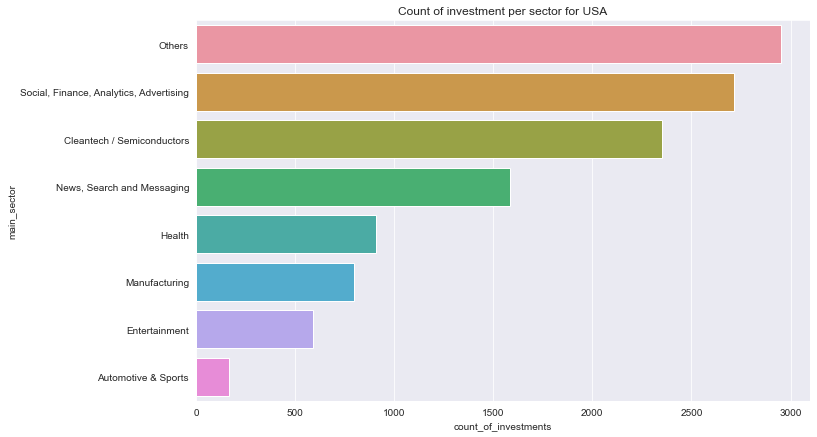

In [93]:
plt.figure(figsize=(11,7))
plt.title('Count of investment per sector for USA')
show_bar_plot(x_data=D1_count_of_investments.count_of_investments ,y_data =D1_count_of_investments.main_sector)

The Top sector for investment for USA is __"Others"__

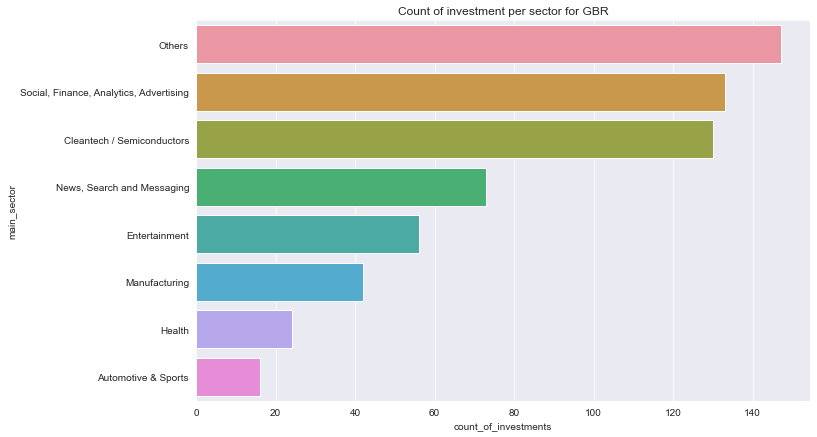

In [94]:
plt.figure(figsize=(11,7))
plt.title('Count of investment per sector for GBR')
show_bar_plot(x_data=D2_count_of_investments.count_of_investments ,y_data =D2_count_of_investments.main_sector)

The Top sector for investment for GBR is __"Cleantech / Semiconductors"__

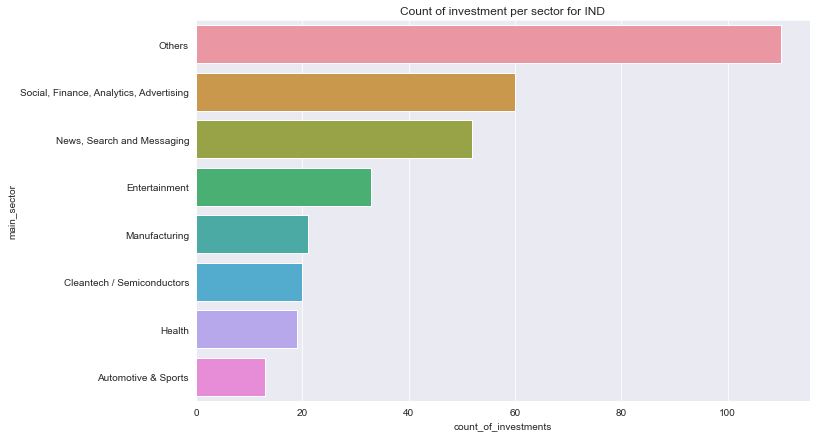

In [95]:
plt.figure(figsize=(11,7))
plt.title('Count of investment per sector for IND')
show_bar_plot(x_data=D3_count_of_investments.count_of_investments ,y_data =D3_count_of_investments.main_sector)

The Top sector for investment for IND is __"Others"__

In [96]:
D1_count_of_investments

,main_sector,count_of_investments
0,Others,2950
1,"Social, Finance, Analytics, Advertising",2714
2,Cleantech / Semiconductors,2350
3,"News, Search and Messaging",1583
4,Health,909
5,Manufacturing,799
6,Entertainment,591
7,Automotive & Sports,167


In [97]:
D2_count_of_investments

,main_sector,count_of_investments
0,Others,147
1,"Social, Finance, Analytics, Advertising",133
2,Cleantech / Semiconductors,130
3,"News, Search and Messaging",73
4,Entertainment,56
5,Manufacturing,42
6,Health,24
7,Automotive & Sports,16


In [98]:
D3_count_of_investments

,main_sector,count_of_investments
0,Others,110
1,"Social, Finance, Analytics, Advertising",60
2,"News, Search and Messaging",52
3,Entertainment,33
4,Manufacturing,21
5,Cleantech / Semiconductors,20
6,Health,19
7,Automotive & Sports,13


### Which company received the highest investment? (For Top 2 Sectors)

In [99]:
#USA
D1_top_sector = D1_count_of_investments.main_sector[0]
D1_second_sector = D1_count_of_investments.main_sector[1]

print(f'Top two Sectors for USA are: \n 1. {D1_top_sector} \n 2. {D1_second_sector}')

#UK
D2_top_sector = D2_count_of_investments.main_sector[0]
D2_second_sector = D2_count_of_investments.main_sector[1]

print(f'Top two Sectors for GBR are: \n 1. {D2_top_sector} \n 2. {D2_second_sector}')


#India
D3_top_sector = D3_count_of_investments.main_sector[0]
D3_second_sector = D3_count_of_investments.main_sector[1]

print(f'Top two Sectors for India are: \n 1. {D3_top_sector} \n 2. {D3_second_sector}')




Top two Sectors for USA are: 
 1. Others 
 2. Social, Finance, Analytics, Advertising
Top two Sectors for GBR are: 
 1. Others 
 2. Social, Finance, Analytics, Advertising
Top two Sectors for India are: 
 1. Others 
 2. Social, Finance, Analytics, Advertising


In [100]:
# Top Sector - USA
D1[D1.main_sector == D1_top_sector].groupby("name")['raised_amount_usd'] \
.agg([('sum_of_investments', 'sum')]) \
.sort_values('sum_of_investments',ascending=False) \
.reset_index()

,name,sum_of_investments
0,virtustream,"64,300,000.00"
1,capella photonics,"54,968,051.00"
2,airtight networks,"54,201,907.00"
3,decarta,"52,100,000.00"
4,black duck software,"51,000,000.00"
...,...,...
2044,coalfire,"5,000,000.00"
2045,clk design automation,"5,000,000.00"
2046,trustyou,"5,000,000.00"
2047,clique intelligence,"5,000,000.00"


The Company in __USA__ in the sector __Others__ (Top Sector)  which received the highest investment is __`virtustream`__

In [101]:
# Second Sector - USA
D1[D1.main_sector == D1_second_sector].groupby("name")['raised_amount_usd'] \
.agg([('sum_of_investments', 'sum')]) \
.sort_values('sum_of_investments',ascending=False) \
.reset_index()

,name,sum_of_investments
0,sst inc. (formerly shotspotter),"67,933,006.00"
1,demandbase,"63,000,000.00"
2,intacct,"61,800,000.00"
3,netbase solutions,"60,600,000.00"
4,lotame,"59,700,000.00"
...,...,...
1842,manicube,"5,000,000.00"
1843,databanq,"5,000,000.00"
1844,vurv technology,"5,000,000.00"
1845,dailybreak media,"5,000,000.00"


The Company in __USA__ in the sector __Social Finance,Analytics,Advertising
__ (Second Sector)  which received the highest investment is __`sst inc. (formerly shotspotter)`__

In [102]:
# Top Sector - GBR
D2[D2.main_sector == D2_top_sector].groupby("name")['raised_amount_usd'] \
.agg([('sum_of_investments', 'sum')]) \
.sort_values('sum_of_investments',ascending=False) \
.reset_index()

,name,sum_of_investments
0,electric cloud,"37,000,000.00"
1,sensage,"36,250,000.00"
2,enigmatec,"32,500,000.00"
3,silverrail technologies,"29,000,000.00"
4,opencloud,"27,972,766.00"
...,...,...
115,vector watch,"5,000,000.00"
116,bullguard,"5,000,000.00"
117,udex,"5,000,000.00"
118,the filter,"5,000,000.00"


The Company in __GBR__ in the sector __Others__ (Top Sector) which received the highest investment is __`electric cloud`__

In [103]:
# Second Sector - GBR
D2[D2.main_sector == D2_second_sector].groupby("name")['raised_amount_usd'] \
.agg([('sum_of_investments', 'sum')]) \
.sort_values('sum_of_investments',ascending=False) \
.reset_index()

,name,sum_of_investments
0,celltick technologies,"37,500,000.00"
1,mythings,"34,000,000.00"
2,zopa,"32,900,000.00"
3,visualdna,"28,550,000.00"
4,marketinvoice,"25,553,007.00"
...,...,...
99,the fizzback group,"5,000,000.00"
100,tamoco,"5,000,000.00"
101,moo.com,"5,000,000.00"
102,rangespan,"5,000,000.00"


The Company in __GBR__ in the sector __Social Finance,Analytics,Advertising
__ (Second Sector)  which received the highest investment is __`celltick technologies`__

In [104]:
# Top Sector - India
D3[D3.main_sector == D3_top_sector].groupby("name")['raised_amount_usd'] \
.agg([('sum_of_investments', 'sum')]) \
.sort_values('sum_of_investments',ascending=False) \
.reset_index()

,name,sum_of_investments
0,firstcry.com,"39,000,000.00"
1,myntra,"38,000,000.00"
2,commonfloor,"32,900,000.00"
3,pepperfry.com,"28,000,000.00"
4,itzcash card ltd.,"25,000,000.00"
...,...,...
83,liases foras,"5,000,000.00"
84,securens,"5,000,000.00"
85,appsdaily solutions,"5,000,000.00"
86,tastykhana,"5,000,000.00"


The Company in __IND__ in the sector __Others__ (Top Sector) which received the highest investment is __`firstcry.com`__

In [105]:
# Second Sector - India
D3[D3.main_sector == D3_second_sector].groupby("name")['raised_amount_usd'] \
.agg([('sum_of_investments', 'sum')]) \
.sort_values('sum_of_investments',ascending=False) \
.reset_index()

,name,sum_of_investments
0,manthan systems,"50,700,000.00"
1,komli media,"28,000,000.00"
2,shopclues.com,"25,000,000.00"
3,intarvo,"21,900,000.00"
4,grameen financial services,"21,556,050.00"
...,...,...
43,authorstream.com,"5,000,000.00"
44,annapurna microfinace,"5,000,000.00"
45,ideacts innovations,"5,000,000.00"
46,akosha,"5,000,000.00"


The Company in __IND__ in the sector __Social Finance,Analytics,Advertising
__ (Second Sector)  which received the highest investment is __`manthan systems`__

## Checkpoint 6: Plots

_As a final step, you have to present your findings to the CEO of Spark Funds. Specifically, she wants to see the following plots:_

1. A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type.
 <br>This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

2. A plot showing the top 9 countries against the total amount of investments of funding type FT.<br>
 This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.
 
3. A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). 



__A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and <br> the average amount of investment in each funding type.
This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.__

In [106]:
total_investments_all_type = master_frame.groupby('funding_round_type')[['raised_amount_usd']].sum().reset_index()
selected_investment_types = total_investments_all_type.loc[total_investments_all_type.funding_round_type.isin(['venture','seed','angel','private_equity'])].reset_index(drop=True)

In [107]:
# Total Investments
selected_investment_types

,funding_round_type,raised_amount_usd
0,angel,"4,659,255,123.00"
1,private_equity,"141,925,436,105.00"
2,seed,"16,989,864,181.00"
3,venture,"590,126,216,876.00"


In [108]:
# Average value of investments
investment_amount_by_funding_type

,raised_amount_usd
funding_round_type,
angel,"958,694.47"
private_equity,"73,308,593.03"
seed,"719,818.00"
venture,"11,748,949.13"


In [109]:
# Calculate Total investments for the selected type of funds
total_of_selected_funds = selected_investment_types.raised_amount_usd.sum()
print(f'The total sum of investments in angel, venture, seed, and private equity is {total_of_selected_funds:,.2f} USD ')

The total sum of investments in angel, venture, seed, and private equity is 753,700,772,285.00 USD 


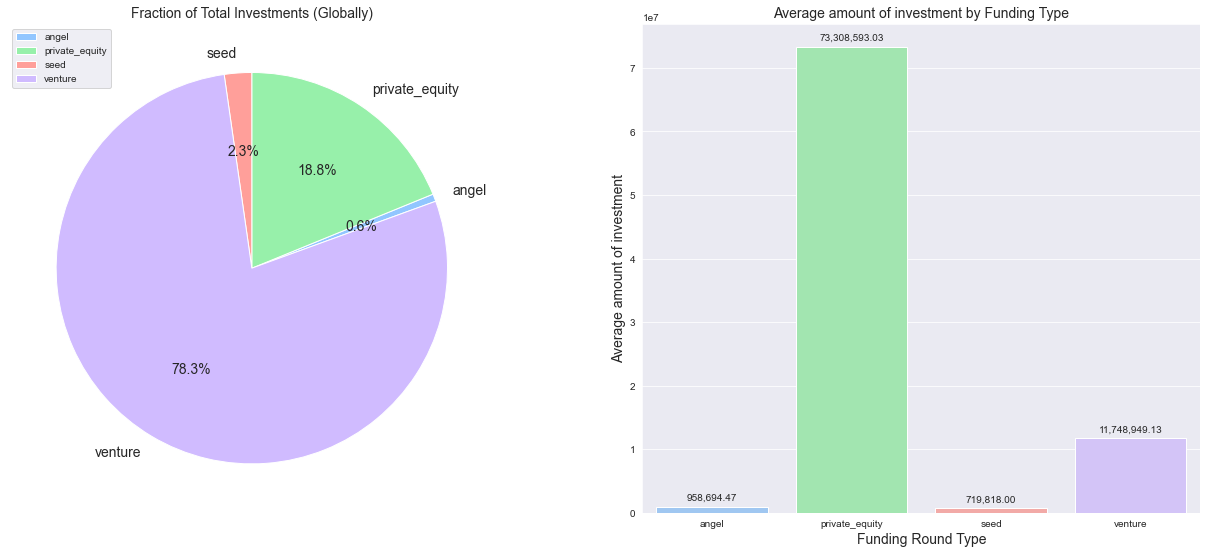

In [110]:

fig = plt.figure(figsize=(22,9))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Pie Chart of total investments in angel, venture, seed, and private equity
ax1.set_title('Fraction of Total Investments (Globally)',fontsize=14)
selected_investment_types.plot(kind='pie',y='raised_amount_usd',labels = selected_investment_types.funding_round_type,startangle=20, ax= ax1,autopct='%1.1f%%',fontsize=14)
ax1.set_ylabel('')

# Bar plot for average amount of investment in each funding type
ax2.set_title('Average amount of investment by Funding Type',fontsize=14)
avg_plot = sns.barplot(x = investment_amount_by_funding_type.index,y='raised_amount_usd',data=investment_amount_by_funding_type,ax = ax2)
for p in avg_plot.patches:
    avg_plot.annotate(format(p.get_height(), ',.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax2.set_xlabel('Funding Round Type',fontsize=14)
ax2.set_ylabel('Average amount of investment',fontsize=14)

plt.show()

__The above charts make it clear that the venture type is the most preferred investment type and should be preferred by spark funds.__ <br>
> 1. __We can see that about 78.3% of total investments are of Venture Fundings type.__ <br>
> 2. __Also the average funding type is 11.7 million which is in the range of preferred investment amount by Spark Funds.__

__A plot showing the top 9 countries against the total amount of investments of funding type FT. <br>
This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.__

In [111]:
top9

,country_code,total_investments_in_usd
94,USA,"422,510,842,796.00"
15,CHN,"39,835,418,773.00"
29,GBR,"20,245,627,416.00"
39,IND,"14,391,858,718.00"
12,CAN,"9,583,332,317.00"
28,FRA,"7,259,536,732.00"
42,ISR,"6,907,514,579.00"
21,DEU,"6,346,959,822.00"
45,JPN,"3,363,676,611.00"


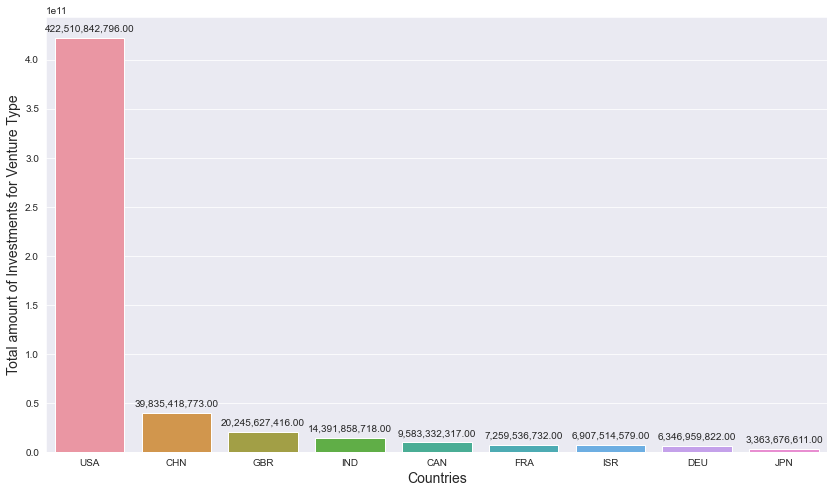

In [112]:
plt.figure(figsize=(14,8))
splot = sns.barplot(x = top9.country_code,y='total_investments_in_usd',data=top9)
for p in splot.patches:
    splot.annotate(format(p.get_height(), ',.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel('Countries',fontsize=14)
plt.ylabel('Total amount of Investments for Venture Type',fontsize=14)
plt.show()

_The top 3 countries by total amount invested are USA, CHINA, and UK. But as for CHINA, English is not an official language. So our final top 3 countries preferred for investments can be concluded as __USA, UK and INDIA__._

__A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT).__

_Let's extract the top 3 sectors from each of the country specific dataframes_

In [113]:
D1_count_of_investments.main_sector[:3]

0                                     Others
1    Social, Finance, Analytics, Advertising
2                 Cleantech / Semiconductors
Name: main_sector, dtype: object

In [114]:
top3_sectors_countries = df_venture_within_invst_range[
        (df_venture_within_invst_range.country_code == 'USA') & (df_venture_within_invst_range.main_sector.isin(D1_count_of_investments.main_sector[:3])) |
        (df_venture_within_invst_range.country_code == 'GBR') & (df_venture_within_invst_range.main_sector.isin(D2_count_of_investments.main_sector[:3])) |
        (df_venture_within_invst_range.country_code == 'IND') & (df_venture_within_invst_range.main_sector.isin(D3_count_of_investments.main_sector[:3]))               
]

In [115]:
top3_sectors_countries_agg = top3_sectors_countries.groupby(['country_code','main_sector']).agg({'raised_amount_usd':'count'}).unstack('main_sector').fillna(0)

In [116]:
top3_sectors_countries_agg.columns = top3_sectors_countries_agg.columns.droplevel()

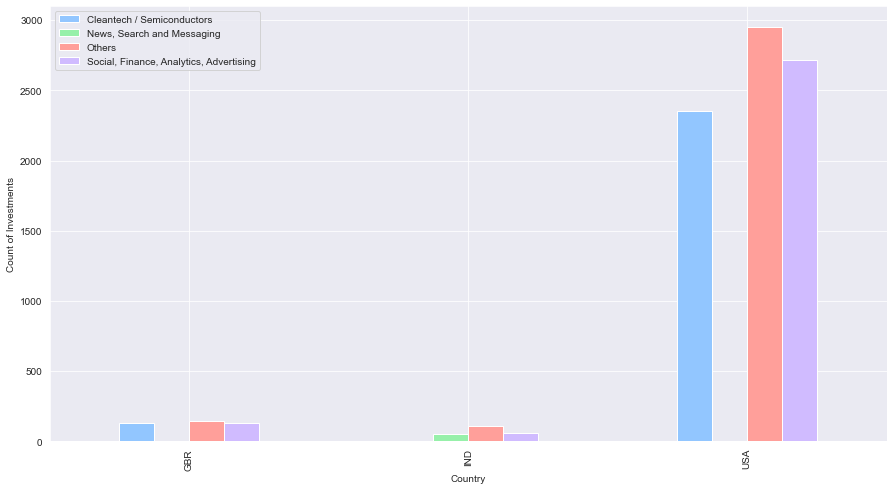

In [117]:

top3_sectors_countries_agg.plot(kind='bar',figsize = (15,8))
plt.xlabel('Country')
plt.ylabel('Count of Investments')
plt.ticklabel_format(style='plain', axis='y')
plt.legend(loc='upper left')
plt.show()

_The above chart shows the count of investments for the top 3 sectors in the top 3 countries for Venture Type Funding._